<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-04-1)
 - (https://bit.ly/hg-04-2)



# Chapter04 다양한 분류 
알고리즘 (럭키백의 확률을 계산하라!)

- 학습목표
    - 로지스틱 회귀, 확률적 경사 하강법과 같은 분류 알고리즘을 배운다.
    - 이진 분류와 다중 분류의 차이를 이해하고 클래스별 확률을 예측한다.
    
## 04-1 로지스틱 회귀

- 핵심키워드
    - 로지스틱 회귀
    - 다중 분류
    - 시그모이드 함수
    - 소프트맥스 함수
    - 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률를 예측한다.
    
### 럭키백의 확률

럭키백은 구성품을 모른 채 먼저 구매하고, 배송받은 다음에야 비로소 구성품을 알 수 있는 상품이다. 책의 예제를 보자. 럭키백에 들어갈 수 있는 생선은 7개라고 알려 주었다. 이 이벤트를 잘 마치려면 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률을 출력해야 한다. 이번에는 길이,높이,두께 외에도 대각선 길이와 무게도 사용할 수 있다.

- 이 새과제를 가지고 생각해보자.
    - 확률은 숫자니까 회귀 문제인가? 7개의 생선에 대한 문제라면 분류 아닐까? 
    - k-최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하면 되지 않을까?
    
사이킷런의 k-최근접 이웃 분류기도 이와 동일한 방식으로 클래스 확률을 계산하여 제공한다. 그럼 데이터를 준비하고 k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률을 계산해 보자.

> 데이터 준비하기

모델 훈련에 사용할 데이터를 만들어 보자. 3장 처럼 판다스를 사용할텐데, 이번에도 인터넷에서 직접 CSV 데이터를 읽어 들일 것이다. 판다스의 read_csv() 함수로 CSV파일을 데이터프레임으로 변환한 다음 head() 메서드로 처음 5개 행을 출력해 보자.

- 이 파일 내용을 직접 보고 싶다면 https://bit.ly//fish_csv_data 로 접속하자.


In [29]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- 맨 왼쪽에 0,1,2 와 같은 숫자는 행 번호(판다스의 인덱스)이다. 맨 위에 쓰여진 Species, Weight, Length, Diagonal, Height, Width는 열 제목이다. 판다스는 CSV 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어 준다.
- 데이터프레임이 뭔가요?
    - 3장에서도 잠깐 언급했지만 데이터프레임(dataframe)은 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다. 데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있다. 데이터프레임은 통계와 그래프를 위한 메서드를 풍부하게 제공한다. 또 데이터프레임은 넘파이로 상호 변환이 쉽고 사이킷럿과도 잘 호환 된다.
    
그럼 어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보자. 판다스의 unique()함수를 사용하면 간단하다.

In [30]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용하겠다. 데이터프레임에서 열을 선택하는 방법은 간단하다. 데이터프레임에서 원하는 열을 리스트로 나열하면 된다. Species 열을 빼고 나머지 5개 열을 선택해 보자.

In [31]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환된다. 이를 to_numpy() 메서드로 넘파이 배열로 바꾸어 fish_input에 저장했다.fish_input에 5개의 특성이 잘 저장되었는지 처음 5개 행을 출력해 보자.

In [32]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


앞에서 fish 데이터프레임을 출력한 값과 비교해보자. 입력 데이터가 잘 준비되었는지 확인했으면 이제 동일한 방식으로 타깃 데이터를 만들자.

In [33]:
fish_target = fish['Species'].to_numpy()

이제 데이터를 훈련 세트와 테스트 세트로 나눈다. 이제 이런 작업이 익숙하게 느껴지면 좋겠다. 2장에서 배웠듯이 머신러닝에서는 기본적으로 데이터 세트 2개가 필요하다.

In [34]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

그 다음 사이킷런의 StrandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리하겠다. 여기에서도 훈련 세트의 통계값으로 테스트 세트를 변환해야 한다는 점을 잊지말자.

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터를 모두 준비했다. 이제 k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률을 예측해 보자.

> ### k-최근접 이웃 분류기의 확률 예측

2장에서 했던 것처럼 사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인해 보겠다. 최근접 이웃 개수인 k를 3으로 지정하여 사용한다.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


여기에서는 클래스 확률을 배우는 것이 목적이므로 훈련 세트와 테스트 세트 점수에 대해서는 잠시 잊도록하자. 

앞서 fish 데이터프레임에서 7개의 생선이 있었던 것을 기억하나요? 타깃 데이터를 만들 때 fish['Species']를 사용해 만들었기 때문에 훈련 세트와 테스트 세트의 타깃 데이터에서도 7개의 생선 종류가 들어가 있다. 이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중분류multi-class classification** 라고 부른다.

하지만 조금 전 코드에서 보듯이 2장에서 만들었던 이진 분류와 모델을 만들고 훈련하는 방식은 동일하다. 이진 분류를 사용했을 때는 양성 클래스와 음성 클래스를 각각 1과 0으로 지정하여 타깃 데이터를 만들었다. 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만 사이킷런에서는 편리하게도 문자열로 된 타깃값을 그대로 사용할 수 있다.

이때 주의할 점이 하나 있다. 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다. 따라서 pd.unique(fish['Species'])로 출력했던 순서와 다르다. KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있다.

In [37]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


'Bream'이 첫 번재 클래스, 'Parkki'가  두 번째 클래스가 되는 식이다. predict() 메서드는 친절하게도 타깃값으로 예측을 출력한다. 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측해 보자.

In [38]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


이 5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까? 사이킷러의 분류 모델은 pridict_proba() 메서드로 클래스별 확률값을 반환한다. 테스트 세트에 있는 처음 5개 샘플에 대한 확률을 출력해보자. 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림을 하는데, decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다.

In [39]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


predict_proba()메서드의 출력 순서는 앞서 보았던 classes_ 속성과 같다. 즉 첫 번째 열이 'Bream'에 대한 확률, 두 번째 열이 'Parkki'에 대한 확률이다. 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보자. 네 번째 샘플의 최근접 이웃의 클래스를 확인해 보자.

- kneighbors() 메서드의 입력은 2차원 배열이어야한다. 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용했다. 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어진다. 여기에서는 네 번째 샘플 하나를 선택했다.

In [40]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개이고 세 번째 클래스인 'Perch'가 2개이다. 따라서 다섯 번째 클래스에 대한 확률은 1/3=0.3333 이고 세 번째 클래스에 대한 확률은 2/3=0.6667이 된다. 앞서 출력한 네 번째 샘플의 클래스 확률과 같다.

성공이다! 아주 쉽게 클래스 확률을 예측했다. 번거로운 계산은 사이킷런이 수행해 주므로 우리는 predict_proba() 메서드를 호출하면 그만이다.그런데 뭔가 좀 이상하다. 잠시 생각해 보니 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은 0/3. 1/3, 2/3, 3/3 이 전부다. 만약 럭키백의 확률을 이렇게만 표시한다면 마케팅팀이 만족하지 않을 것 같다. 확률이라고 말하기 좀 어색하다. 뭔가 더 좋은 방법을 찾아야 할 것 같다.


### 로지스틱 회귀

**로지스틱 회귀 logistic regression** 는 이름은 회귀이지만 분류 모델이다. 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습한다.확률이 되려면 0~1 또는 0%~ 100%가 사이의 값이 되어야한다. z가 아주 큰 음수일때 0이되고, z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법이 없을까?

- 시그모이드 함수 sigmoid function 또는 로지스틱 함수 logistic function 를 사용하면 가능하다.

z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수가 될 때는 1에 가까워진다. z가 0이 될 때는 0.5가 된다. z가 어떤 값이 되더라도 '파이'는 절대로 0 ~ 1사이의 범위를 벗어 날 수 없다. 그렇다면 0 ~ 1 사이 값을 0~100까지 확률로 해석할 수 있다.

넘파이를 사용하면 그래프를 간단히 그릴 수 있다. -5와 5사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수를 계산한다. 지수 함수 계산은 np.exp()함수를 사용한다.

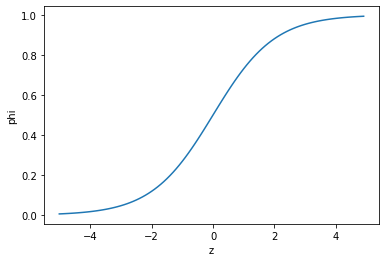

In [41]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수의 출력은 정말 0에서 1까지 변한다. 좋다. 그럼 로지스틱 회귀 모델을 훈련해보자. 이미 예상했겠지만 당연히 사이킷런에는 로지스틱 회귀 모델인 LogisticRegression 클래스가 준비되어 있다. 훈련하기 전에 간단한 이진 분류를 수행해보자. 이진 분류일 경우 시그모이드 함수의 출력이 0.5보다 크면 양성 클래스, 0.5보다 작으면 음성 클래스로 판단한다. 그럼 먼저 도미와 빙어 2개를 사용해서 이진 분류를 수행해 보자.

- 딱 0.5일때는 어떻게 되나?
    - 정학히 0.5일 때 라이브러리마다 다를 수 있다. 사이킷런은 0.5일때 음성 클래스로 판단한다.
    
    
> ### 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열을 True, False 값을 전달하여 행을 선택 할 수 있다. 이를 **불리언 인덱싱 boolean indexing** 이라고 한다. 간단한 예를 보면 금방 이해할 수 있다. 다음과 같이 'A'에서 'E'까지 5개의 원소로 이루어진 배열이 있다. 여기서 'A'와 'C'만 골라내려면 첫 번째와 세 번째 원소만 True이고 나머지 원소는 모두 False인 배열을 전달하면 된다.

In [42]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


이와 같은 방식을 사용해 훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라내겠다. 비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다. 예를 들어 도미인 행을 골라내려면 train_target =='Bream'과 같이 쓴다. 이 비교식은 train_target 배열에서 'Bream'인 것은 True이고 그 외는 모두 False인 배열을 반환한다. 도미와 빙어에 대한 비교 결과를 비트 OR 연산자(|)를 사용해 합치면 도미와 빙어에 대한 행만 골라낼 수 있다.

In [43]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes 배열은 도미와 빙어일 경우 True이고 그 외는 모두 False 값이 들어가 있다 따라서 이 배열을 사용해 train_scaled와 train_target 배열에 불리언 인덱싱을 적용하면 손쉽게 도미와 빙어 데이터만 골라 낼 수 있다. 

이제 이 데이터로 로지스틱 회귀 모델을 훈련해보겠다. LogisticRegression 클래스는 선형 모델이므로 sklearn.linear_model 패키지 아래 있다.

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 예측해 보자.

In [45]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


두 번째 샘플을 제외하고 모두 도미로 예측했다. KNeifgborsClassifier와 마찬가지로 예측 확률은 predict_proba() 메서드에서 제공한다. train_bream_smelt에서 처음 5개 샘플의 예측 확률을 출력해 보자.

In [46]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


샘플마다 2개의 확률이 출력되었다. 첫 번째 열이 음성 클래스(0)에 대한 확률이고 두 번째 열이 양성 클래스(1)에 대한 확률이다. 그럼 Bream과 Smelt중에 어떤 것이 양성 클래스일까? 앞서 k-최근접 이웃 분류기에서 보았듯이 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용한다. classes_속성에서 확인해 보자.

In [47]:
print(lr.classes_)

['Bream' 'Smelt']


빙어(smelt)가 양성 클래스다. predict_proba() 메서드가 반환한 배열 값을 보면 두 번째 샘플만 양성 클래스인 빙어의 확률이 높다. 나머지는 모두 도미(Bream)로 예측하겠다.

- 만약 도미(Bream)을 양성 클래스로 사용하려면 어떻게 해야 할까? 2장에서 했던 것처럼 Bream인 타깃값을 1로 만들고 나머지 타깃값은 0으로 만들어 사용하면 된다.

로지스틱 회귀로 성공적인 이진 분류를 수행했다. 그럼 선형 회귀에서처럼 로지스틱 회귀가 학습한 계수를 확인해 보자.

In [48]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


확실히 로지스틱 회귀는 선형 회귀와 매우 비슷하다. 그럼 LogisticRegression 모델로 z 값을 계산해 볼 수 있을까? 가능하다. LogisticRegression 클래스는 decision_function() 메서드로 z 값을 출력할 수 있다. train_bream_smelt의 처음 5개 샘플의 z 값을 출력해 보자.

In [49]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다. 다행히 파이썬의 사이파이(scipy) 라이브러리에서도 시그모이드 함수가 있다. 바로 expit()이다. np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전하다. decisions 배열의 값을 확률로 변환해 보자.

In [50]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


출력된 값을 보면 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다. 즉 decision_function() 메서드는 양성 클래스에 대한 z값을 반환한다.

좋다. 아주 훌륭하다. 이진 분류를 위해 2개의 생선 샘플을 골라냈고 이를 사용해 로지스틱 회귀 모델을 훈련했다. 이진 분류일 경우 predict_proba()메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력한다. 또 decision_function() 메서드는 양성 클래스에 대한 z 값을 계산한다. 또 coef_ 속성과 intercept_ 속성에는 로지스틱 모델이 학습한 선형 방정식의 계수가 들어 있다.

이제 이진 분류의 경험을 바탕으로 7개의 생선을 분류하는 다중 분류 문제로 넘어가 보자.

> 로지스틱 회귀로 다중 분류 수행하기

앞에서 이진 분류를 위해 로지스틱 회귀 모델을 훈련시켜 보았다. 다중 분류도 크게 다르지 않다. 여기에서도 LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용한다. max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100이다. 여기에 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고가 발생한다. 충분하게 훈련시키기 위해 반복 횟수를 1,000으로 늘리겠다.

또 LogisticRression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제한다. 이런 규제를 L2 규제라고도 부른다. 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했다. alpha가 커지면 규제도 커진다. LogisticRergession에서 규제를 제어하는 매개변수는 C이다. 하지만 C 는 alpha와 반대로 작을수록 규제가 커진다. C의 기본값은 1이다. 여기에서는 규제를 조금 완하하기 위해 20으로 늘리겠다.

다음 코드는 LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드이다. 7개의 생선 데이터가 모두 들어 있는 train_scaled와 train_target을 사용한 점을 눈여겨 보자.

In [51]:
lr = LogisticRegression (C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우친 것 같지 않다. 좋다. 그럼 테스트 세트의 처음 5개 샘플에 대한 예측을 출력해 보자.

In [52]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


이번에는 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해 보자.출력을 간소하게 하기 위해 소수점 네 번째 자리에서 반올림 하겠다.

In [53]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


와우, 많은 숫자가 출력되었다. 5개 샘플에 대한 예측이므로 5개의 행이 출력되었다. 또 7개 생선에 대한 확률을 계산했으므로 7개의 열이 출력되었다. 이진 분류일 경우 2개의 열만 있었다는 것을 기억하자.

첫 번째 샘플을 보면 세 번째 열의 확률이 가장 높다. 84.1%나 된다. 세 번째 열이 농어(Perch)에 대한 확률일까? classes_ 속성에서 클래스 정보를 확인해 보자.

In [54]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


네, 맞다. 첫 번째 샘플은 Perch를 가장 높은 확률로 예측했다. 두 번째 샘플은 여섯 번째 열인 Smelt를 가장 높은 확률(94.6%)로 예측했다.

다중 분류도 어렵지 않다. 이진 분류는 샘플마다 2개의 확률을 출력하고 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다. 여기에서는 7개이다. 이 중에서 가장 높은 확률이 예측 클래스가 된다.

그럼 다중 분류일 경우 선형 방정식은 어떤 모습일까? coef_, intercept_ 의 크기를 출력해 보자.

In [55]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이 데이터는 5개의 특성을 사용하므로 coef_ 배열의 열은 5개이다. 그런데 행이 7이다. intercept_도 7개나 있다. 이 말은 이진 분류에서 보았던 z를 7개나 계산한다는 의미이다. 혹시 눈치 챘나? 다중 분류는 클래스마다 z 값을 하나씩 계산한다. 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 된다. 그럼 확률은 어떻게 계산한 것일까? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환했다. 다중 분류는 이와 달리 **소프트맥스 softmax** 함수를 사용하여 7개의 z값을 확률로 변환한다.

- 소프트맥스 함수란?
    - 시그모이드 함수는 하나의 선형 방정식의 출력값을 0~1사이로 압축한다. 이와 달리 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 만든다. 이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수 함수**라고도 부른다.
    
- 시그모이드 함수와 소프트맥스 함수가 중요한가?
    - 시그모이드 함수와 소프트맥스 함수를 왜 이렇게 자세히 공부하는지 궁금할 수 있다. 사이킷런에서 자동으로 계산해 주지만 이 두함수는 나중에 신경망을 배울 때 또다시 등장한다. 여기에서 자세히 익혀두면 나중에 신경망을 배울 때 훨 씬 더 잘 이해할 수 있다.
    
    
그럼 이진 분류에서처럼 decision_function() 메서드로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸어 보겠다. 먼저 테스트 세트의 처음 5개 샘플에 대한 z1 ~ z7의 값을 구해보자.



In [56]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


역시 사이파이는 소프트맥스 함수도 제공한다. scipy.special 아래에 softmax()함수를 임포트해 사용하겠다.

In [57]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 decision 배열을 softmax()함수에 전달했다. softmax()의 axis 매개변수는 소프트맥스를 계산할 축을 지정한다. 여기에서는 axis=1로 지정하여 각 행, 즉 각 샘플에 대한 소프트맥스를 계산한다. 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.

출력 결과를 앞서 구한 proba 배열과 비교해 보자. 결과가 정확히 일치한다. 성공이다. 로지스틱 회귀를 사용해 7개의 생선에 대한 확률을 예측하는 모델을 훈련했다. 이런 확률 값을 사용자에게 보여줄 수 있다면 마케팅 팀과 고객 만족팀을 모두 만족시킬 수 있겠다.


### 로지스틱 회귀로 확률 예측 - 문제해결 과정

럭키백에 담긴 생선이 어떤 생선인지 확률을 예측하는 문제였다. 분류 모델은 예측뿐만 아니라 예측의 근거가 되는 확률을 출력할 수 있다. 어찌 보면 이 확률은 분류 모델이 얼마나 예측을 확신하는지 나타낸다. 확률이 높을수록 강하게 예측하는 셈이다.

k-최근접 이웃 모델이 확률을 출력할 수 있지만 이웃한 샘플의 클래스 비율이므로 항상 정해진 확률만 출력한다. 이는 마케팅 팀의 요구사항을 만족시킬 수 없을 것 같다. 고객이 어느 정도 생선을 예상할 수 있지만 상품마다 좀 더 그럴싸한 확률을 표시했으면 한다.

이를 위해 가장 대표적인 분류 알고리즘 중 하나인 로지스틱 회귀를 사용했다. 로지스틱 회귀는 회귀 모델이 아닌 분류 모델이다. 선형 회귀처럼 선형 방정식을 사용한다. 하지만 선형 회귀처럼 계산한 값을 그대로 출력하는 것이 아니라 로지스틱 회귀는 이 값을 0 ~ 1 사이로 압축한다. 우리는 이 값을 마치 0 ~ 100% 사이의 확률로 이해할 수 있다.

로지스틱 회귀는 이진분류에서는 하나의 선형 방정식을 훈련한다. 이 방정식의 출력값을 시그모이드 함수에 통과시켜 0 ~ 1사이의 값을 만든다. 이 값이 양성 클래스에 대한 확률이다. 음성 클래스의 확률은 1에서 양성 클래스의 확률을 빼면 된다.

다중 분류일 경우에는 클래스 개수만큼 방정식을 훈련한다. 그 다음 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 만든다. 이 값을 각 클래스에 대한 확률로 이해할 수 있다.

다음 절에서는 인기가 높고 성능이 뛰어난 또 다른 머신러닝 알고리즘인 확률적 경사 하강법에 대해 배워보겠다.


> 전체 소스 코드

- https://bit.ly/hg-04-1 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.

In [58]:
### 데이터 준비하기

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [59]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [60]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [61]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [62]:
fish_target = fish['Species'].to_numpy()

In [63]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접 이웃 분류기의 확률 예측

In [65]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [66]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [67]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [68]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [69]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


로지스틱 회귀

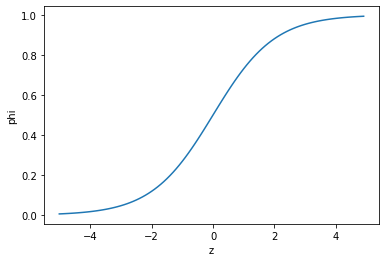

In [70]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱 회귀로 이진 분류 수행하기

In [71]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [72]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [74]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [75]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [76]:
print(lr.classes_)

['Bream' 'Smelt']


In [77]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [78]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [79]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


로지스틱 회귀로 다중 분류 수행하기

In [80]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [81]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [82]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [83]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [84]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [85]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [86]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 04-2 확률적 경사 하강법

- 핵심 키워드
    - 확률적 경사 하강법
    - 손실 함수
    - 에포크
    - 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배운다.
    
#### 점진적인 학습

문제: 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공하고있다. 하지만 수산물을 고급하겠다는 곳이 너무 많아 샘플을 골라내는 일이 너무 힘들다. 하지만 수산물을 공급하겠다는 곳이 너무 많아 샘플을 골라내는 일이 너무 힘들다. 게다가 추가되는 수산물은 아직 샘플을 가지고 있지도 않는다. 영업 팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공하겠다고 약속했다. 하지만 어느 생선이 먼저 올지도, 모든 생선이 도착할 때까지 기다릴 수도 없다. 이제 어떻게 해야 할까?

훈련 데이터가 한 번에 준비되는 것이 아니라 조금씩 전달된다는 것이다. 도착하는 대로 생선을 판매해야 하므로 데이터가 쌓일 때까지 무작정 기다릴 수도 없다. 그렇다면 기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련하면 어떨까?

괜찮은 아이디어이다. 이렇게 하면 매일 추가되는 새로운 데이터를 활용해 모델을 훈련할 수 있다. 한 가지 단점은 시간이 지날수록 데이터가 늘어나는 것이다. 처음 며칠은 괜찮겠지만, 몇달이 지나면 모델을 훈련하기 위해 서버를 늘려야 한다. 만약 몇 년이 지난다면... 확실히 지속 가능한 방법은 아닌 것 같다.

또 다른 방법은 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 후련 데이터 크기를 일정하게 유지하는 것이다. 이렇게 하면 데이터셋의 크기가 너무 커지지 않을 수 있다. 하지만 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있다면 큰일이다. 앞으로 모델이 그 생선을 제대로 예측하지 못할 테니까요. 흠, 더 좋은 방법이 없을까?

위에서 언급한 방법은 이전에 훈련한 모델을 버리고 다시 새로운 모델을 훈련하는 방식이다. 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 없을까? 이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 생선을 까먹을 일도 없을 것이다.

이런 식의 훈련 방식을 **점진적 학습** 또는 온라인 학습이라고 부른다. 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법 Stochastic Gradient Descent** 이다. 물론 사이킷런에서도 확률적 경사 하강법을 위한 클래스를 제공한다. 확률적 경사 하강법을 사용하기 전에 어떤 알고리즘인지, 또 왜 중요한지에 대해 먼저 알아보겠다.

> 확률적 경사 하강법

확률적 경사 하강법에서 확률적이란 말은 '무작위하게' 혹은 '랜덤하게' 의 기술적인 표현이다. 이 의미는 조금 나중에 다시 살펴보겠다. 그다음 '경사'는 '이 언덕은 경사가 참 가파르군!' 할 때 그 경사이다. 즉 기울기를 말하는 것이다. '하강법'은 '내려가는 방법'이다. 다시 말해 경사 하강법은 경사를 따라 내려가는 방법을 말한다. 산에서 내려온다고 생각해보자. 집으로 돌어가려면 등산로 입구까지 내려가야 한다. 만약 어떤 산길로 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는 것이 좋겠다. 가장 빠른 길은 경사가 가장 가파른 길이다.!

경사 하강법이 바로 이런 방식이다. 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표이다. 하지만 가제트 형사의 긴 다리를 생각해보자. 만약 한번에 걸음이 너무 크면 경사를 따라 내려가지 못하고 오히려 올라갈 수가 있다.

조금 과장되었지만, 실제로 산에서 내려올 때는 천천히 조금씩 내려와야한다. 나뭇잎 속에 가려진 웅덩이가 있을지도 모르니까.. 경사 하강법도 마찬가지이다. 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다. 이렇게 내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것이다.

좋다. 그럼 이제 **확률적** 이란 말을 이해할 차례이다. 경사 하강법으로 내려올때 가장 가파른 길을 찾는 방법을 무엇일까? 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾자! 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 **확률적 경사 하강법** 이다.

조금 더 자세히 설명하면 다음과 같다. 확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할때 까지 계속한다.

이제 모든 샘플을 다 사용했다. 그래도 산을 다 내려오지 못했으면 어떻게 할까? 간단하다. 다시 처음부터 시작하는 것이다. 훈련 세트에 모든 샘플을 다시 채워 넣는다. 그다음 다시 랜검하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 이렇게 만족할만한 위치에 도달할 때까지 계속 내려가면 된다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 **에포크 epoch**라고 부른다. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.

아니 무작위로 샘플을 선택해 산에서 내려가다니 너무 무택임한 것 아닐까? 그래서 아주 조금씩 내려가야 한다. 하지만 걱정하는 것과는 달리 확률적 경사 하강법은 꽤 잘 동작한다. 만약 그래도 걱정이 된다면 1개씩 말고 무작위로 몇개의 샘플을 선택해서 경사를 따라 내려가면 어떨까? 가능하다. 이렇게 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식을 **미니배치 경사 하강법 minibatch gradient descent** 이라고 한다. 실전에서 아주 많이 사용한다.

극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 **배치 경사 하강법 batch gradient descent** 라고 부른다. 사실 전체 데이터를 사용하기 때문에 가장 안정적인 방법이 될 수 있다. 하지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다. 어떤 경우는 데이터가 너무너무 많아 한 번에 전체 데이터를 모두 읽을 수 없을지도 모른다.

확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘이다. 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 계속 이어 나갈 수 있다. 즉 다시 산꼭대기에서부터 시작할 필요가 없다.

- 확률적 경사 하강법과 신경망 알고리즘
    - 확률적 경사 하강법을 꼭 사용하는 알고리즘이 있다. 바로 신경망 알고리즘이다. 신경망은 일반적으로 많은 데이터를 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다. 또 모델이 매우 복잡하기 때문에 수학적인 방법으로 해답을 얻기 어렵다. 신경망 모델이 확률적 경사 하강법이나 미니배치 경사 하강법을 사용한다는 점을 꼭 기억하자.
    
그런데 어디서 내려야 할까? 다시 말해 가장 빠른 길을 찾아 내려가려고 하는 이 산은 도대체 무엇일까? 이 산이 바로 손실 함수라 부르는 것이다.


#### 손실함수

**손실함수 loss function** 는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 그렇다면 손실 함수의 값이 작을 수록 좋다. 하지만 어떤 값이 최솟값인지는 알지 못한다. 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을 것 같다.

다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다. 그럼 생선을 분류하기 위해서는 어떤 손실 함수를 사용하는지 알아보자.

- 손실 함수와 비용 함수
    - 비용 함수(cost function)는 손실 함수의 다른 말이다. 엄밀히 말하면 손실 함수는 샘플 하나에 대한 손실을 정의하고 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다. 하지만 보통 이 둘을 엄격히 구분하지 않고 섞어서 사용한다.
    
분류에서 손실은 아주 확실하다. 정답을 못 맞히는 거다. 이해를 돕기위해 도미와 빙어를 구분하는 이진 분류 문제를 예로 들어보겠다. 도미는 양성클래스(1), 빙어는 음성 클래스(0)라고 가정해보자. 4개의 예측 중에 2개만 맞았으므로 정확도는 1/2=0.5이다. 정확도를 손실 함수로 사용할 수 있을까? 예를 들어 정확도에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높다. 손실 함수로 괜찮지 않을까?

하지만 정확도는 0, 0.25, 0.5, 0.75, 1 다섯 가지뿐이다. 앞에서 경사 하강법을 사용할 때 아주 조금씩 내려온다고 했던 말을 기억하나? 정확도가 이렇게 듬성듬성하다면 경사 하강법을 이용해 조금씩 움직일 수 없다. 산의 경사면은 확실히 연속적이어야 한다.

- 기술적으로 말하면 손실 함수는 미분 가능해야 합니다. 여기서는 독자들이 이해하기 쉽도록 최대한 비유를 사용했다.

그럼 어떻게 연속적인 손실 함수를 만들 수 있을까? 1절 '로지스틱 회귀'에서 로지스틱 회귀 모델이 확률을 출력한 것을 기억하나? 예측은 0또는 1이지만 확률은 0 ~ 1 사이의 어떤 값도 될 수 있다. 즉 연속적이다. 가령 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8 이라고 가정해 보자. 첫 번째 샘플부터 하나씩 어떻게 손실 함수를 만들 수 있는지 살펴보자.

> 로지스틱 손실 함수

첫 번째 샘플의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다. 이 경우 예측이 1에 가까울수록 좋은 모델이다. 예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다. 이 값을 손실 함수로 사용해도 괜찮겠다.

- 0.9 x 1 => -0.9

두 번째 샘플의 예측은 0.3이다. 타깃이 양성 클래스(1)인데 거리가 멀다. 위에서와 마찬가지로 예측과 타깃을 곱해 음수로 바꿔 보자. 이 값은 -0.3이 되기 때문에 확실히 첫 번째 샘플보다 높은 손실이 된다!

- 0.9 x 1 => -0.9
- 0.3 x 1 => -0.3

세 번째 샘플을 보자. 이 샘플의 타깃은 음성 클래스라 0이다. 이 값을 예측 확률인 0.2와 그대로 곱해서는 곤란하다. 무조건 0이 될 테니까요. 한 가지 방법은 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 거다. 대신 예측값도 양성 클래스에 대한 예측으로 바꾼다. 즉 1 - 0.2 = 0.8로 사용 한다. 그 다음 곱하고 음수로 바꾸는 것은 위와 동일하다.

- 0.9 x 1 => -0.9
- 0.3 x 1 => -0.3
- 0.2 => 0.8 x 1 => -0.8

어떤가? 세 번째 샘플은 음성 클래스인 타깃을 맞추었으므로 손실이 낮아야 한다. -0.8은 꽤 낮은 손실이다. 이제 네 번째 샘플을 보자. 네 번째 샘플도 타깃은 음성 클래스이다. 하지만 정답을 맞히지 못했다. 타깃을 1로 바꾸고 예측 확률을 1에서 뺀 다음 곱해서 음수로 바꿔 보자.

- 0.9 x 1 => -0.9
- 0.3 x 1 => -0.3
- 0.2 => 0.8 x 1 => -0.8
- 0.8 => 0.2 x 1 => -0.2

네 번째 샘플의 손실이 높다. 예측 확률을 사용해 이런 방식으로 계산하면 연속적인 손실 함수를 얻을 수 있을 것 같다. 여기에서 예측 확률에 로그 함수를 적용하면 더 좋다. 예측 확률의 범위는 0 ~ 1 사이 인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. 손실이 양수가 되면 이해하기 더 쉽다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.

정리하면 양성 클래스(타깃=1) 일때 손실은 -log(예측확률)로 계산 한다. 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다. 음성 클래스(타깃=0)일 때 손실은 -log(1-예측 확률)로 계산한다. 이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.

- 타깃은 무조건 1로 바꾸어 곱해지므로 식을 간단하게 나타내기 위해 따로 쓰지 않았다.

이 손실 함수를 **로지스틱 손실 함수 logistic loss funktion**라고 부른다. 또는 **이진 크로스엔트로피 손실 함수 binary cross-entropy loss function**라고도 부른다.

- 다양한 손실 함수
    - 로지스틱 손실 함수란 이름에서 혹시 눈치챘을지 모르지만 이 손실 함수를 사용하면 로지스틱 회귀 모델이 만들어진다. 이 절의 끝에서 분류를 위한 다른 손실 함수도 있다는 것을 소개하겠다.
    
여기에서는 이진 분류를 예로 들어 설명했지만 다중 분류도 매우 비슷한 손실 함수를 사용한다. 다중 분류에서 사용하는 손실 함수를 **크로스엔트로피 손실 함수 cross-entropy loss function**라고 부른다.

앞서 설명했지만 사실 손실 함수를 우리가 직접 만드는 일은 거의 없다. 이미 문제에 잘 맞는 손실 함수가 개발되어 있기 때문이다. 이진 분류는 로지스틱 손실 함수를 사용하고 다중 분류는 크로스엔트로피 손실 함수를 사용한다.

- 그럼 회귀에는 어떤 손실 함수를 사용할까?
    - 회귀의 손실 함수로 3장에서 소개한 평균 절댓값 오차를 사용할 수 있다. 타깃에서 예측을 뺀 절댓값을 모든 샘플에 평균한 값이다. 또는 **평균 제곱 오차 mean squared error 를 많이 사용한다. 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균한 값이다. 확실히 이 값이 작을 수록 좋은 모델이다.
    
손실 함수를 직접 계산하는 일 또한 드물다. 머신러닝 라이브러리가 처리해 주니까 걱정할 필요가 없다. 하지만 손실 함수가 무엇인지, 왜 정의를 해야하는지 이해하는 것이 중요하다. 자 그럼 확률적 경사 하강법을 사용한 분류 모델을 만들어 보자.

### SGDClassifier

이번에도 fish_csv_data 파일에서 판다스 데이터프레임을 만들어 보자.



In [87]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

그 다음 Species 열을 제외한 나머지 5개는 입력 데이터로 사용한다. Species 열은 타깃 데이터 이다.

In [88]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

사이킷런의 train_test_split() 함수를 사용해 이 데이터를 훈련세트와 테스트 세트로 나눈다.

In [89]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

이제 훈련 세트와 테스트 세트의 특성을 표준화 전처리한다. 다시 한번 강조하지만 꼭 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 한다.

In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

특성값의 스케일을 맞춘 train_scaled 와 test_scaled 두 넘파이 배열을 준비했다. 여기까지는 이전과 동일하다. 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier 이다. sklearn.linear_model 패키지 아래에서 임포트해 보자.

In [91]:
from sklearn.linear_model import SGDClassifier

SGDClassifier 의 객체를 만들 때 2개의 매개변수를 지정한다. loss는 손실 함수의 종류를 지정한다. 여기에서는 loss='log'로 지정하여 로지스틱 손실 함수를 지정했다. max_iter는 수행할 에포크 횟수를 지정한다. 10으로 지정하여 전체 훈련 세트를 10회 반복하겠다. 그 다음 훈련세트와 테스트 세트에서 정확도 점수를 출력한다.

In [92]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


출력된 훈련 세트와 테스트 세트 정확도가 낮다. 아마도 지정한 반복 횟수 10번이 부족한 것으로 보인다.

- CovergenceWarning 경고가 뜬다?
    - 이 코드를 실행하면 사이킷런은 친절하게도 모델이 충분히 수렴하지 않았다는 CovergenceWarning 경고를 보낸다. 이런 경고를 보았다면 max_iter 매개변수의 값을 늘려 주는 것이 좋다. 오류가 아닌 경고이므로 실습은 이대로 진행 하겠다.
    
앞서 이야기한 것처럼 확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해보자. 모델을 이어서 훈련할 때는 partial_fit()메서드를 사용한다. 이 메서드는 fit() 메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다. partial_fit() 메서드를 호출하고 다시 훈련 세트와 테스트 세트의 점수를 확인해 보자.

In [93]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상되었다. 이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있다. 그런데 얼마나 더 훈련해야 할까? 무작정 많이 반복할 수는 없고 어떤 기준이 필요하겠다.

- 이건 배치 경사 하강법 아닌가요?
    - train_scaled와 train_target을 한꺼번에 모두 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법 아닌가요? 아니다. SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행한다. 아쉽지만 SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않는다. 하지만 7장에서 배울 신경망에서 미니배치 경사 하강법을 사용해 보자.
    
### 에포크와 과대/과소적합

3장에서 배웠던 과소적합과 과대적합을 기억하나? 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.왜 이런 현상이 일어나는지 잠시 생각해 보자.

에포크 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 마치 산을 다 내려오지 못 하고 훈련을 마치는 셈이다. 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다. 훈련 세트에 아주 잘 맞는 모델이 만들어진다.

바꾸어 말하면 적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다. 반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다. 이 그래프는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것이다. 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작한다. 바로 이지점이 모델이 과대적합되기 시작하는 곳이다. 과대적합이 시작하기 전에 훈련을 멈추는 것을 **조기 종료 earily stopping**라고 한다. 그럼 우리가 준비한 데이터셋으로 위와 같은 그래프를 만들어 보겠다.

이 예제에서는 fit()메서드를 사용하지 않고 partial_fit() 메서드만 사용하겠다. partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스 레이블을 partial_fit() 메서드에 전달해 주어야한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.

In [94]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

300번의 에포크 동안 훈련을 반복하여 진행해 보겠다. 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가한다.

In [95]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

- 파이썬의 _는 특별한 변수이다. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용한다. 여기에서는 0에서 299까지 반복 횟수를 임시 저장하기 위한 용도로 사용했다.

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려 보겠다.

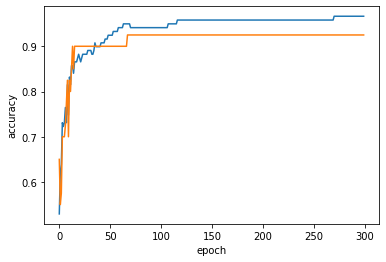

In [96]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 파랑색: 훈련 세트 그래프 / 주황색: 테스트세트 그래프

데이터가 작기 때문에 아주 잘 드러나지는 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.

그럼 SGDClassifier의 반복 횟수를 100에 맞추고 모델을 다시 훈련해 보겠다. 그리고 최종적으로 훈련 세트와 테스트 세트에서 점수를 출력한다.

In [97]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에서 향상될 최솟값을 지정한다. 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 무조건 반복하도록 하였다.

최종 점수가 좋다. 훈련 세트와 테스트 세트에서의 정확도 점수가 비교적 높게 나왔다. 확률적 경사 하강법을 사용한 생선 분류 문제도 성공적으로 수행했다.

- 확률적 경사 하강법을 사용한 분류 모델이 있다면 회귀 모델도 있나요?
    - 네, 있다. SGDRegressor가 바로 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공한다. 사용하는 방법은 SGDClassifier과 동일하다.
    
이 섹션을 마무리하기 전에 SGDClassifier의 loss 매개변수를 잠시 알아보겠다. 사실 loss 매개변수의 기본값은 'hinge'이다. **힌지 손실hinge loss**은 **서포트 벡터 머신 support vector machine**이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. 여기에서는 힌지 손실과 서포트 벡터 머신에 대해 더 자세히 다루지 않는다. 하지만 서포트 벡터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나라는 점과 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다는 것만 기억하자.

간단한 예로 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해 보겠다.

In [98]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


### 점진적 학습을 위한 확률적 경사 하강법 - 문제해결 과정

생선을 실시간으로 학습하기 위한 새로운 머신러닝 모델이 필요하다. 이를 위래 확률적 경사 하강법을 사용해 점진적으로 학습하는 로지스틱 회귀모델을 훈련했다.

확률적 경사 하강법은 손실 함수라는 산을 정의하고 가장 가파른 경사를 따라 조금씩 내려오는 알고리즘이다. 충분히 반복하여 훈련하면 훈련 세트에서 높은 점수를 얻는 모델을 만들 수 있다. 하지만 훈려늘 반복 할수록 모델이 훈련 세트에 점점 더 잘 맞게 되어 어느 순간 과대적합되고 테스트세트의 정확도가 줄어들 것이다.

요즘엔 대량의 데이터를 이용해 문제를 해결해야 하는 일이 매우 흔하다. 이런 넘쳐나는 데이터가 머신러닝과 인공지능의 발전에 크게 기여했다. 데이터가 매우 크기 때문에 전통적인 머신러닝 방식으로 모델을 만들기 어렵다. 데이터를 한 번에 모두 컴퓨터 메모리에 읽을 수 없기 때문이다. 따라서 데이터를 조금씩 사용해 점진적으로 학습하는 방법이 필요해졌다. 확률적 경사 하강법이 바로 이 문제를 해결하는 핵심 열쇠이다. 7장에서 신경망을 다룰 때 좀 더 자세히 확률적 경사 하강법을 다시 다뤄 보겠다.

지금까지 회귀와 분류에 널리 사용되는 다양한 알고리즘을 배웠다. 최근접 이웃, 선형 회귀, 릿지, 라쏘, 로지스틱 회귀, 확률적 경사 하강법 등이다. 이 알고리즘들은 실전에서 널리 사용되는 뛰어난 기법이지만 최고는 아니다. 신경망 알고리즘을 제외 하고 머신러닝에서 가장 뛰어난 성능을 내는 알고리즘이 있다. 말 그대로 대세인거다. 다음 장에서 이 알고리즘을 배워 본다.

> 전체 소스 코드

- https://bit.ly/hg-04-2 에 접속하면 코랩에서 이 절의 코드를 바로 열어 볼 수 있다.

확률적 경사 하강법

SGDClassifier

In [99]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [100]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [101]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [103]:
from sklearn.linear_model import SGDClassifier

In [104]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [105]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


에포크와 과대/과소적합

In [106]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [107]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

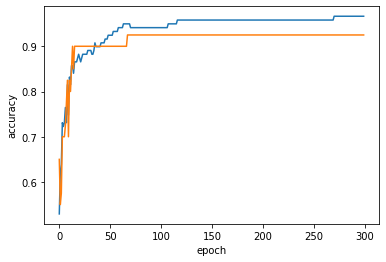

In [108]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [109]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [110]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


- 출처: 혼자 공부하는 머신러닝 + 딥러닝